# BNN on Pynq

This notebook covers how to use Binary Neural Networks on Pynq. 
It shows an example of image recognition with a binarized neural network inspired at VGG-16, featuring 6 convolutional layers, 3 max pool layers and 3 fully connected layers


## 1. Import the package

In [1]:
import bnn

## 2. Checking available parameters

By default the following trained parameters are available for CNV network using 1 bit for weights and activation:

In [2]:
print(bnn.available_params(bnn.NETWORK_CNVW1A1))

['streetview', 'road-signs', 'cifar10']


## 3. Instantiate a Classifier

Creating a classifier will automatically download the correct bitstream onto device and load the weights trained on the specified dataset. Passing a runtime attribute will allow to choose between hardware accelerated or pure software inference.

Use `CnvClassifier(network,parameters,runtime)` for CNV network topology:

In [3]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_HW)
sw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_SW)

## 4. List the classes

The CIFAR10 dataset includes 10 classes of images, the names of which are accessible through the classifier.

In [4]:
print(hw_classifier.classes)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


## 5. Open image to be classified
Download a JPEG image of a deer and place it in a valid directory. The image can then be loaded and displayed through the notebook.

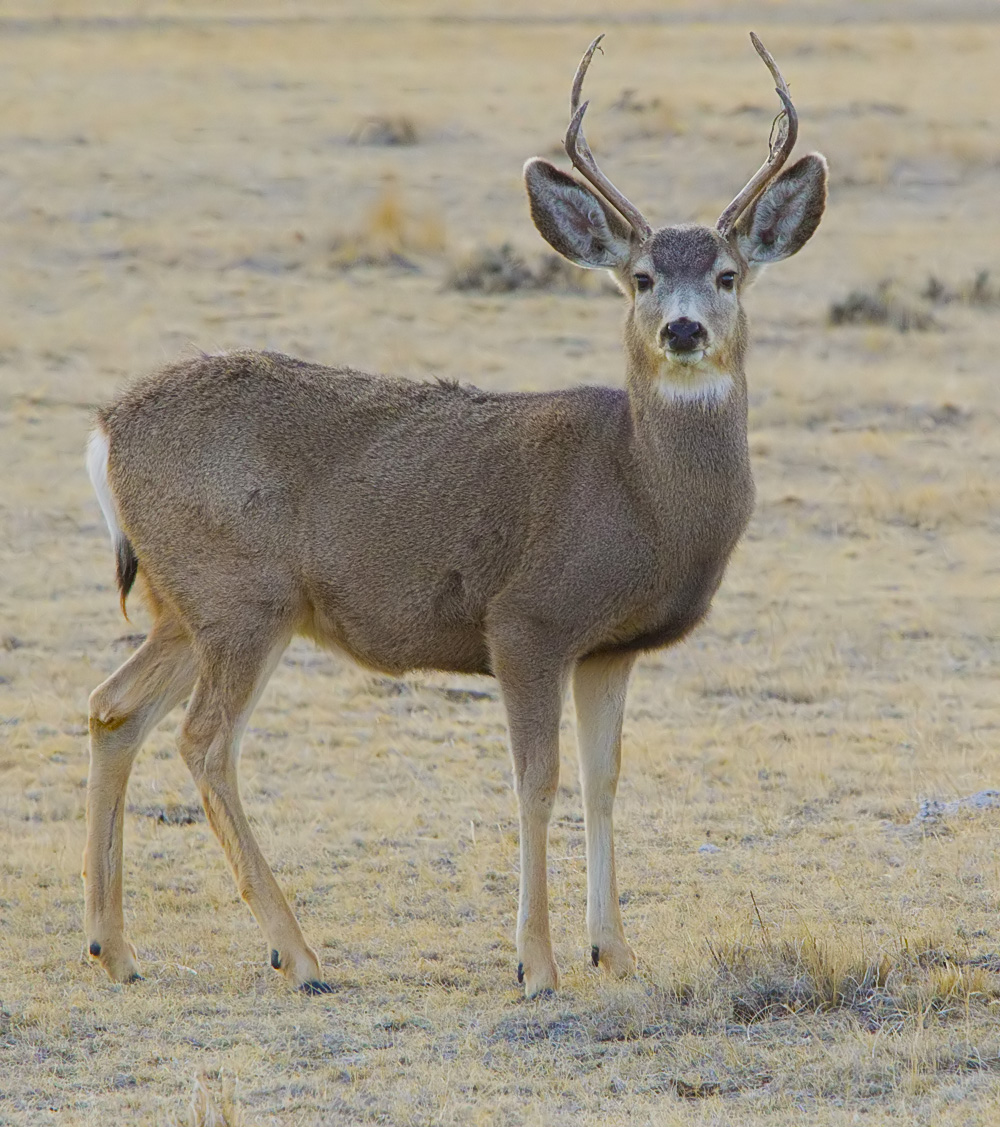

In [5]:
from PIL import Image
import numpy as np

im = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/deer.jpg')
im 

## 4. Launching BNN in hardware
The image is passed into the PL and the inference is performed. The Python API takes care of resizing the image to the format required by the network (Cifar-10 format) and transferring the image between hardware and software.

In [6]:
class_out=hw_classifier.classify_image(im)
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(hw_classifier.class_name(class_out)))

Inference took 527.00 microseconds
Classification rate: 1897.53 images per second
Class number: 4
Class name: Deer


## 5. Launching BNN in software
As a comparison, the same image can be classified using a software implementation of the algorithm.

In [7]:
class_out = sw_classifier.classify_image(im)
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(sw_classifier.class_name(class_out)))

Inference took 418664.00 microseconds
Classification rate: 2.39 images per second
Class number: 4
Class name: Deer


As it can be seen, the software implementation is several orders of magnitude slower than the hardware implementation.

## 6. Detailed Classification Information

In addition to the highest ranked class output, it is possible to get the ranking of every class using the `classify_details` function. To run this example, take another couple of images. Here, a car, an airplane, and a bird will be classified in order to compare the rankings.

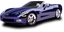

Inference took 528.00 microseconds
Classification rate: 1893.94 images per second
   [CLASS]    [RANKING]
  Airplane       258
Automobile       417
      Bird       233
       Cat       206
      Deer       238
       Dog       215
      Frog       222
     Horse       238
      Ship       236
     Truck       249


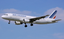

Inference took 528.00 microseconds
Classification rate: 1893.94 images per second
   [CLASS]    [RANKING]
  Airplane       412
Automobile       237
      Bird       233
       Cat       214
      Deer       248
       Dog       239
      Frog       242
     Horse       234
      Ship       250
     Truck       247


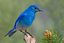

Inference took 528.00 microseconds
Classification rate: 1893.94 images per second
   [CLASS]    [RANKING]
  Airplane       268
Automobile       241
      Bird       387
       Cat       262
      Deer       284
       Dog       289
      Frog       236
     Horse       248
      Ship       230
     Truck       227


In [8]:
from IPython.display import display

im = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/car.png')
im.thumbnail((64, 64), Image.ANTIALIAS)
display(im) 
car_class = hw_classifier.classify_image_details(im)
print("{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(car_class)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],car_class[i]))

im = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/airplane.jpg')
im.thumbnail((64, 64), Image.ANTIALIAS)
display(im) 
air_class = hw_classifier.classify_image_details(im)
print("{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(air_class)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],air_class[i]))

im = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/bird.jpg')
im.thumbnail((64, 64), Image.ANTIALIAS)
display(im) 
bird_class = hw_classifier.classify_image_details(im)
print("{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(bird_class)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],bird_class[i]))


The numbers can be difficult to visualise so we can use matplotlib to graph the output. Numbers are shown in units of 100:

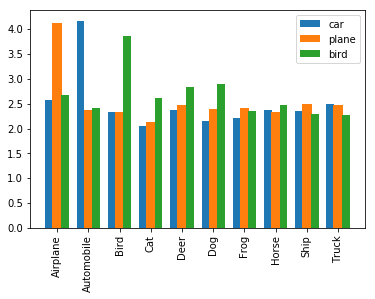

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

x_pos = np.arange(len(car_class))
fig, ax = plt.subplots()
ax.bar(x_pos - 0.25, (car_class/100.0), 0.25)
ax.bar(x_pos, (air_class/100.0), 0.3)
ax.bar(x_pos + 0.25, (bird_class/100.0), 0.25)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.legend(["car","plane","bird"])
plt.show()

## 8. Reseting the device

In [10]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()